In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from google.colab import files

%matplotlib inline

Using TensorFlow backend.


In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
print(keras.__version__)

2.3.1


In [ ]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# to get the summary of the model
model.summary()

# configure the model for traning by adding metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/chest_xray_original/train/",
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/chest_xray_original/test/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

# training the model
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 112s 11s/step - loss: 0.1675 - accuracy: 0.9430 - val_loss: 1.7256 - val_accuracy: 0.6538
Epoch 2/10
10/10 [==============================] - 110s 11s/step - loss: 0.3302 - accuracy: 0.8990 - val_loss: 0.4303 - val_accuracy: 0.8157
Epoch 3/10
10/10 [==============================] - 112s 11s/step - loss: 0.1778 - accuracy: 0.9320 - val_loss: 0.4751 - val_accuracy: 0.8045
Epoch 4/10
10/10 [==============================] - 108s 11s/step - loss: 0.1697 - accuracy: 0.9319 - val_loss: 0.4121 - val_accuracy: 0.8077
Epoch 5/10
10/10 [==============================] - 107s 11s/step - loss: 0.1509 - accuracy: 0.9391 - val_loss: 1.0428 - val_accuracy: 0.7196
Epoch 6/10
10/10 [==============================] - 111s 11s/step - loss: 0.1228 - accuracy: 0.9492 - val_loss: 0.6496 - val_accuracy: 0.7484
Epoch 7/10
10/10 [==============================] - 110s 11s/step

In [ ]:
model.save("/content/drive/My Drive/model_lungs/model_made_with_testset.h5")

In [ ]:
# load new unseen dataset
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    '/content/drive/My Drive/chest_xray_original/val/',
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 16 images belonging to 2 classes.
loss rate at evaluation data : 0.304176390171051
accuracy rate at evaluation data : 0.8125


In [ ]:

model = tf.keras.models.load_model('/content/drive/My Drive/model_lungs/model_made_with_testset.h5')

Saving IM-0117-0001.jpeg to IM-0117-0001.jpeg
[0.]
IM-0117-0001.jpeg is normal


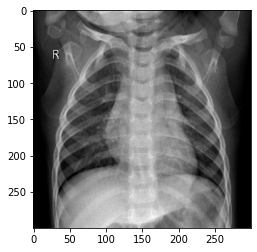

In [ ]:
# allow user to upload the image to predict
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]> 0.5:
    print(fn + ' is pneumonia')
    plt.imshow(img)
  else:
    print(fn + ' is normal')
    plt.imshow(img)